# Life Expectancy Dataset

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

## Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [163]:
data = pd.read_csv('Life Expectancy Data.csv')

# As in traditional print of data, all columns are not visible 
pd.set_option('display.max_columns',None)
data.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [164]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [165]:
for col in data.columns:
    print(col)
    print(data[col].describe())
    print("-------------------------------------------")

Country
count            2938
unique            193
top       Afghanistan
freq               16
Name: Country, dtype: object
-------------------------------------------
Year
count    2938.000000
mean     2007.518720
std         4.613841
min      2000.000000
25%      2004.000000
50%      2008.000000
75%      2012.000000
max      2015.000000
Name: Year, dtype: float64
-------------------------------------------
Status
count           2938
unique             2
top       Developing
freq            2426
Name: Status, dtype: object
-------------------------------------------
Adult Mortality
count    2928.000000
mean      164.796448
std       124.292079
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       723.000000
Name: Adult Mortality, dtype: float64
-------------------------------------------
infant deaths
count    2938.000000
mean       30.303948
std       117.926501
min         0.000000
25%         0.000000
50%         3.000000
75%        22.0000

In [166]:
data.info()
# Results show that only Country and Status are object, remaining columns are either float or int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

In [167]:
miss_val = data.isnull().sum()
print(f'Missing Values in the data:\n {miss_val}' )


Missing Values in the data:
 Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64


In [168]:
missingpercent = data.isnull().sum()/len(data) * 100
print(f'Missing Values in percentage: \n {missingpercent}')

Missing Values in percentage: 
 Country                             0.000000
Year                                0.000000
Status                              0.000000
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
Life expectancy        

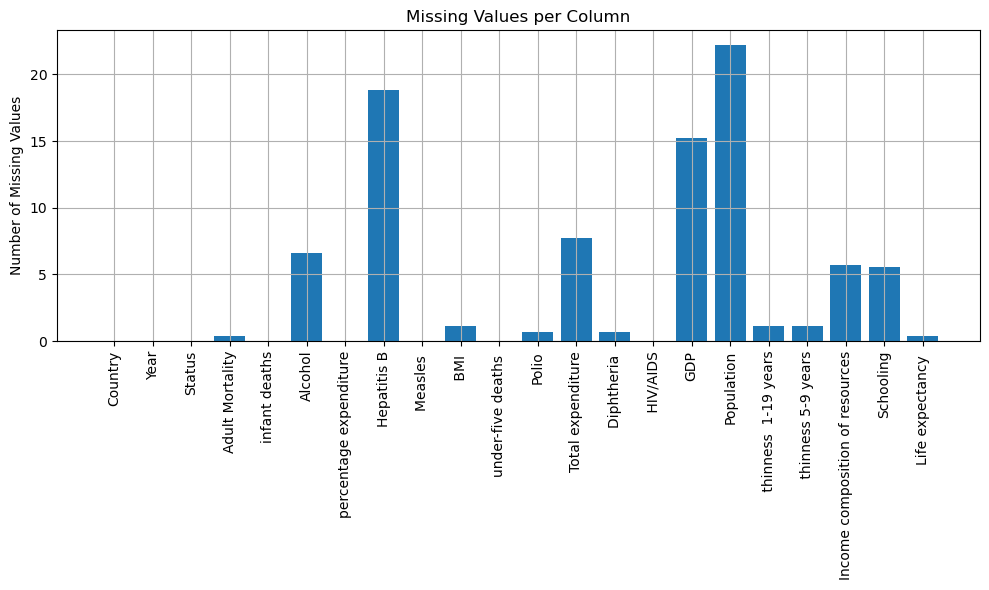

In [169]:
plt.figure(figsize=(10, 6))
plt.bar(data.columns,missingpercent)
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

In [170]:
# Checing for duplicate values 
print(f"duplicated values in the dataset: {data.duplicated().sum()}")

duplicated values in the dataset: 0


## Imputing Values 

In [171]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#  As our target columns 'Life Expectancy' has mising values, we can not impute it 
data['Life expectancy '].dropna(inplace=True)
print('Data after removing target nulls ',data.shape)

# checking missing values that are less than 7% to remove them 
cols = [col for col in data.columns if (data[col].isnull().sum()/len(data)) < 0.05 and (data[col].isnull().sum()/len(data)) > 0]
print(f"Columns have missing values less than 5% are : {cols} ")
print(f"Percentage of missing in each column is: \n {data[cols].isnull().sum()/len(data) * 100}")


Data after removing target nulls  (2938, 22)
Columns have missing values less than 5% are : ['Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy '] 
Percentage of missing in each column is: 
 Adult Mortality          0.340368
 BMI                     1.157250
Polio                    0.646698
Diphtheria               0.646698
 thinness  1-19 years    1.157250
 thinness 5-9 years      1.157250
Life expectancy          0.340368
dtype: float64


In [172]:
for coll in cols:
    print(f"Statistics of {coll} is {data[coll].min(), data[coll].max(), data[coll].mean(), data[coll].median()}")

cols[2]

Statistics of Adult Mortality is (1.0, 723.0, np.float64(164.79644808743168), 144.0)
Statistics of  BMI  is (1.0, 87.3, np.float64(38.321246556473824), 43.5)
Statistics of Polio is (3.0, 99.0, np.float64(82.55018842069202), 93.0)
Statistics of Diphtheria  is (2.0, 99.0, np.float64(82.32408359027065), 93.0)
Statistics of  thinness  1-19 years is (0.1, 27.7, np.float64(4.839703856749312), 3.3)
Statistics of  thinness 5-9 years is (0.1, 28.6, np.float64(4.870316804407714), 3.3)
Statistics of Life expectancy  is (36.3, 89.0, np.float64(69.22493169398908), 72.1)


'Polio'

In [173]:
cols

['Adult Mortality',
 ' BMI ',
 'Polio',
 'Diphtheria ',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Life expectancy ']

In [174]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

# Fix column names to match actual DataFrame columns (strip spaces, check for typos)
mean_cols = [cols[0],cols[2],cols[3]]
median_cols = [cols[1],cols[4],cols[5]]

data[mean_cols] = mean_imputer.fit_transform(data[mean_cols])
data[median_cols] = median_imputer.fit_transform(data[median_cols])

In [175]:
data = data.dropna(subset=['Life expectancy '])
print(f"Data after removing nulls in Life expectancy: {data.isnull().sum()}")

Data after removing nulls in Life expectancy: Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
Life expectancy                      0
dtype: int64


In [176]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Life expectancy '])
Y = data['Life expectancy ']


In [177]:
Y.describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [178]:
X_int = X.select_dtypes(include=['int64', 'float64'])
year = X_int['Year']
X_int = X_int.drop(columns=['Year'])  
for col in X_int:
    print(f"Column : {col} has distribution {X_int[col].skew():2f}")
    if X_int[col].skew() > 0: 
        print(f"Col {col} is positively skewed")
    elif X_int[col].skew() < 0:
        print(f"Col {col} is negatively skewed")
    else:
        print(f"Col {col} is normally distributed")

    print("--------------------------------------------------------------------------")


Column : Adult Mortality has distribution 1.174369
Col Adult Mortality is positively skewed
--------------------------------------------------------------------------
Column : infant deaths has distribution 9.771044
Col infant deaths is positively skewed
--------------------------------------------------------------------------
Column : Alcohol has distribution 0.587276
Col Alcohol is positively skewed
--------------------------------------------------------------------------
Column : percentage expenditure has distribution 4.643790
Col percentage expenditure is positively skewed
--------------------------------------------------------------------------
Column : Hepatitis B has distribution -1.933774
Col Hepatitis B is negatively skewed
--------------------------------------------------------------------------
Column : Measles  has distribution 9.425290
Col Measles  is positively skewed
--------------------------------------------------------------------------
Column :  BMI  has distri

In [179]:
# Applying Normalization 
for col in X_int.columns:
        # Calculate min and max for the column
    col_min = X_int[col].min()
    col_max = X_int[col].max()
    
    # Avoid division by zero if column has constant values
    if col_max == col_min:
        print(f"Skipping column {col} because it has constant values (min = max = {col_min})")
    continue
            
    # Apply min-max normalization and save in the same column
    X_int[col] = (X_int[col] - col_min) / (col_max - col_min)
    print(f"Normalized column {col}")

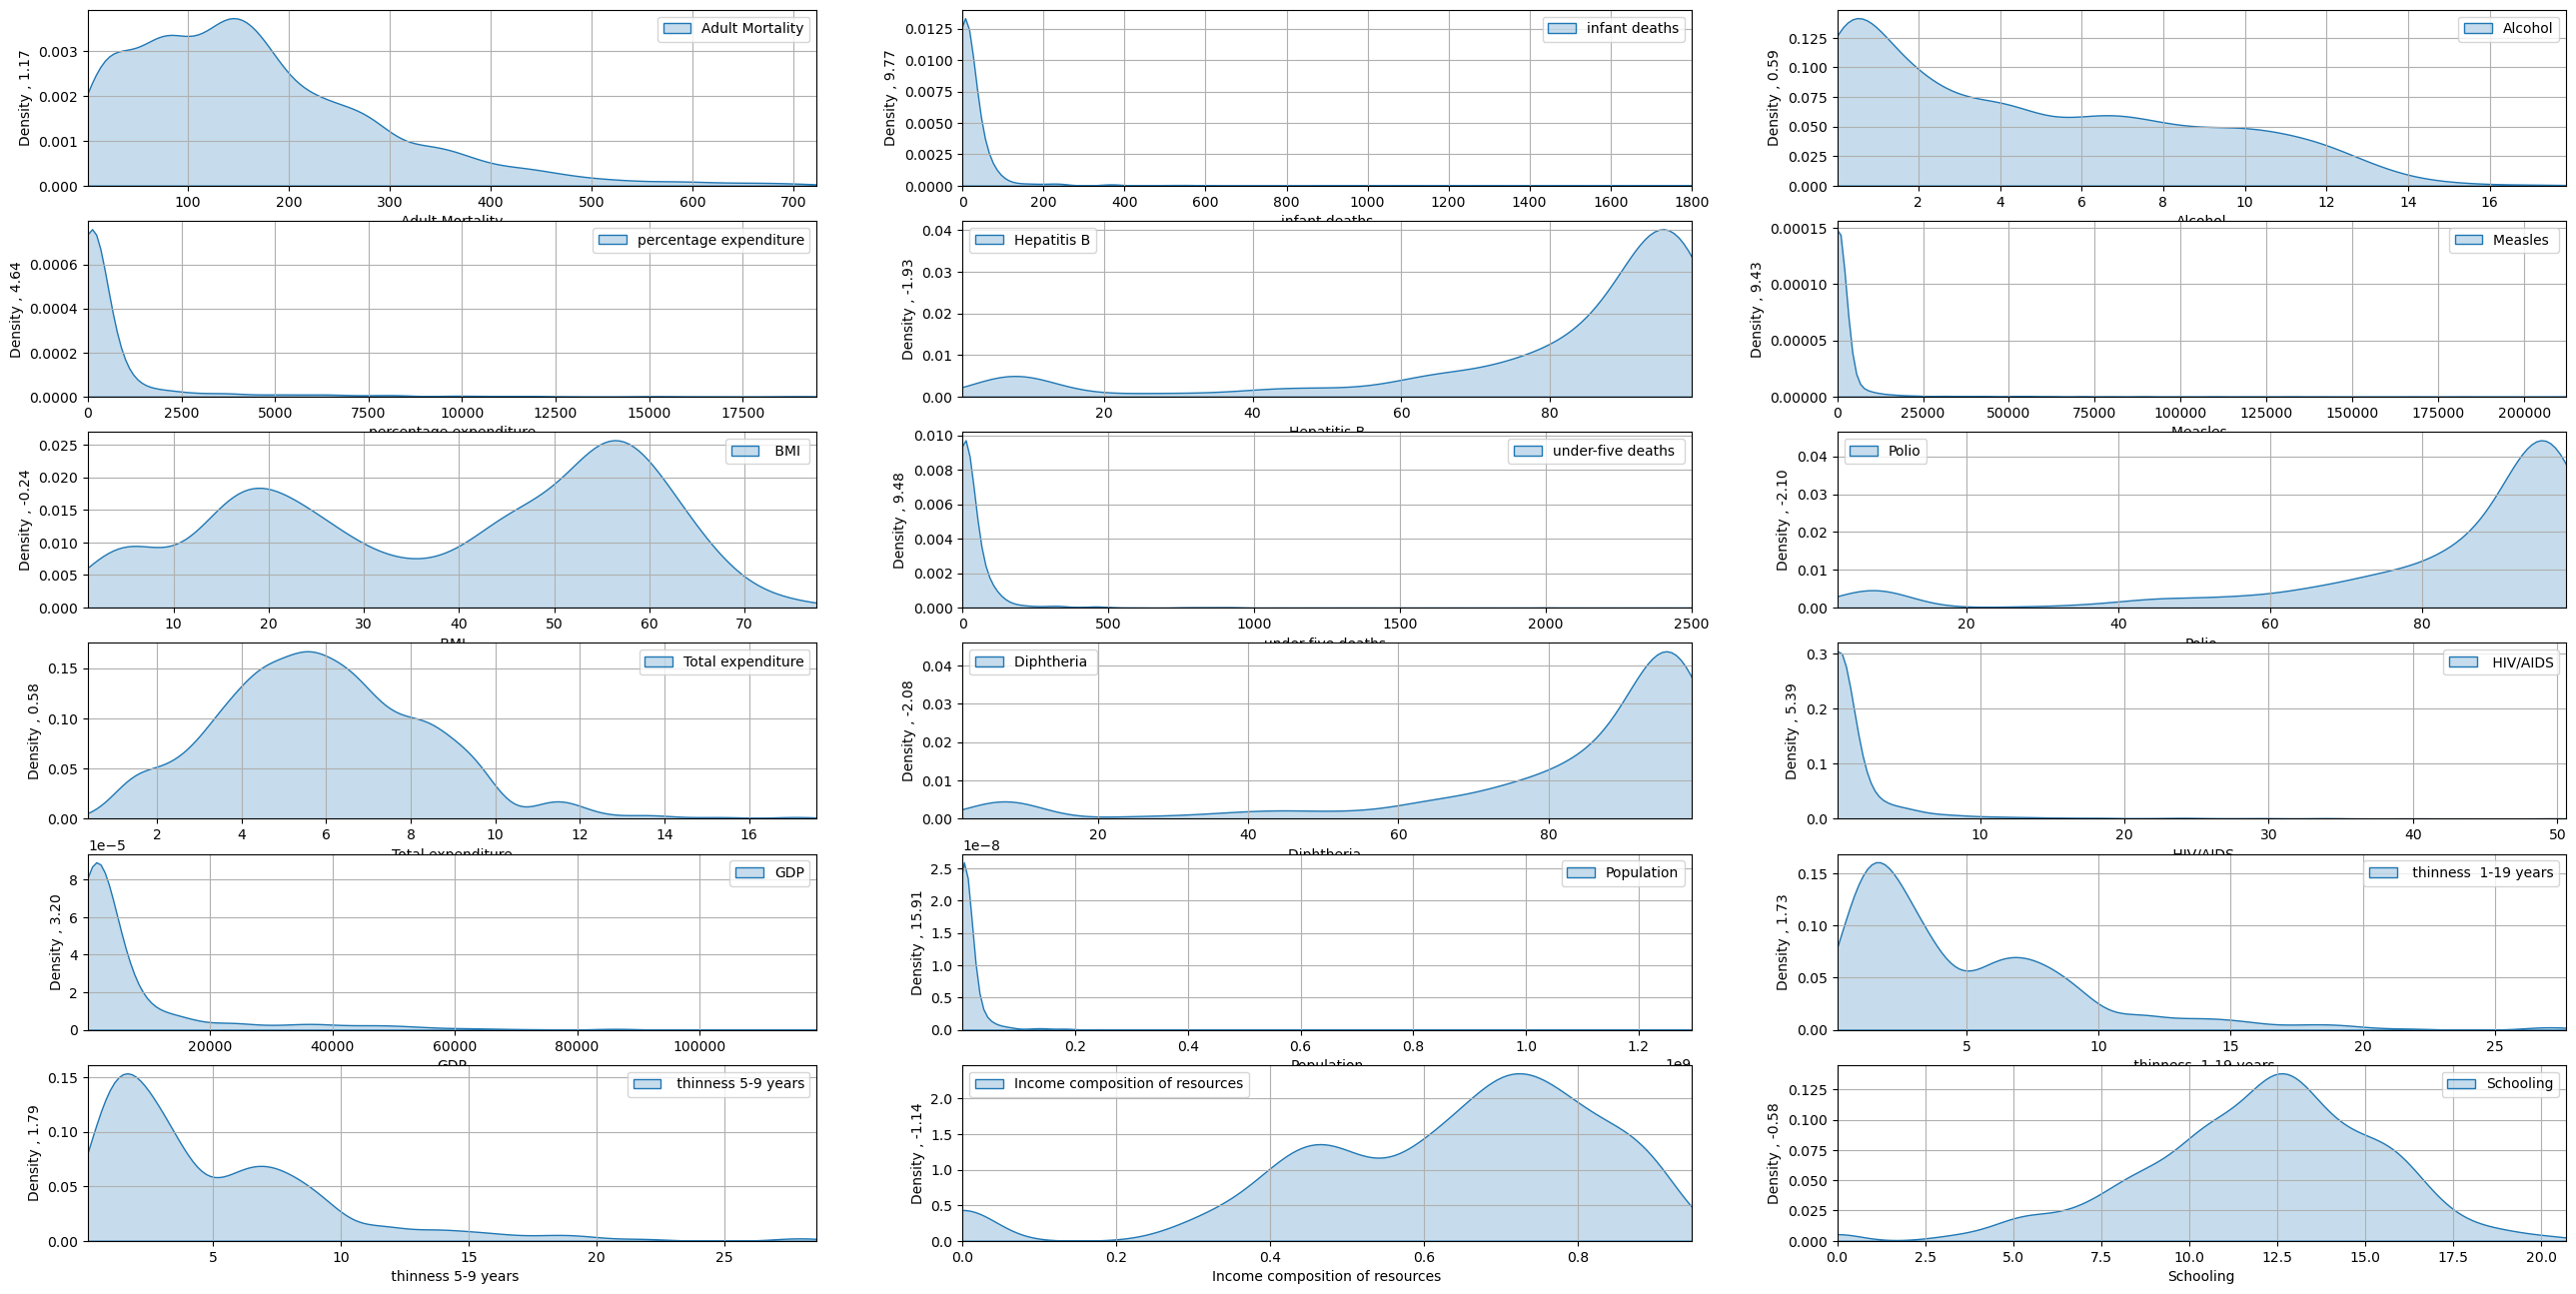

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
left_skew, right_skew = [],[]
plt.figure(figsize=(32, 16))  # Increased figure size for a bigger graph
for ind, col in enumerate(X_int):
    plt.subplot(6, 3, ind + 1)
    skewness = X_int[col].skew()
    if skewness > 0:
        left_skew.append(col)
    elif skewness < 0:
        right_skew.append(col)
    sns.kdeplot(X_int[col], label=col, fill=True)
    plt.xlim(X_int[col].min(), X_int[col].max())
    plt.xlabel(col)
    plt.ylabel(f'Density , {skewness:.2f}')
    plt.legend()
    plt.grid()

In [181]:
print(f"Columns that are Left Skewed : {left_skew}")
print()
print(f"Columns that are Right Skewed : {right_skew}")

Columns that are Left Skewed : ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ', 'under-five deaths ', 'Total expenditure', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years']

Columns that are Right Skewed : ['Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ', 'Income composition of resources', 'Schooling']


C:\Users\Abdullah\AppData\Local\Temp\ipykernel_17032\3717172949.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_int[right_skew], vert=False, labels=right_skew)


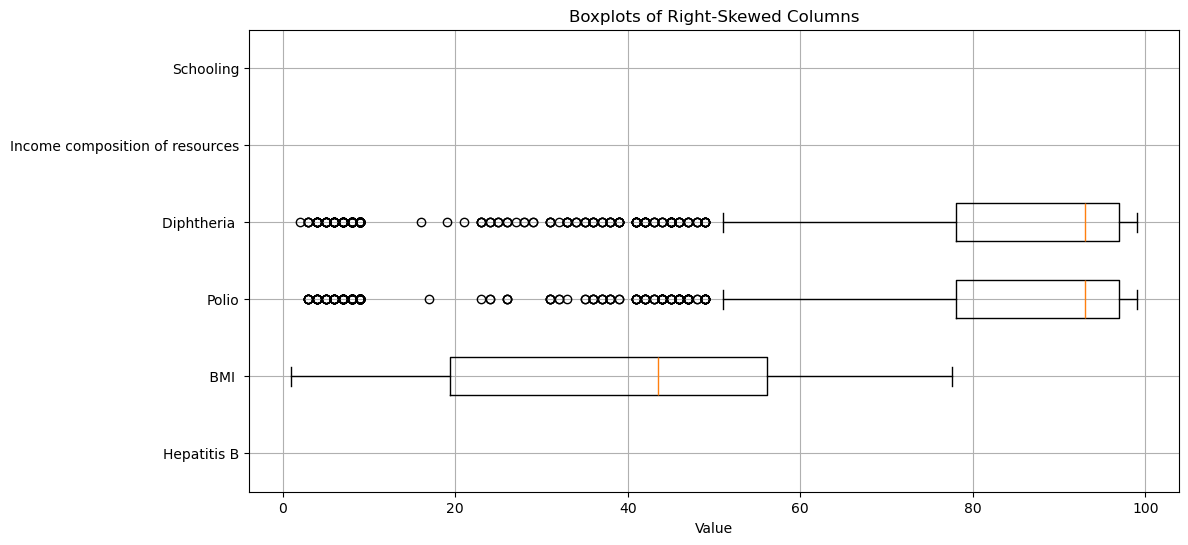

In [182]:
plt.figure(figsize=(12, 6))  
plt.boxplot(X_int[right_skew], vert=False, labels=right_skew)
plt.grid()
plt.xlabel("Value")
plt.title("Boxplots of Right-Skewed Columns")
plt.show()

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_17032\2405044846.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_int[left_skew], vert=False, labels=left_skew)


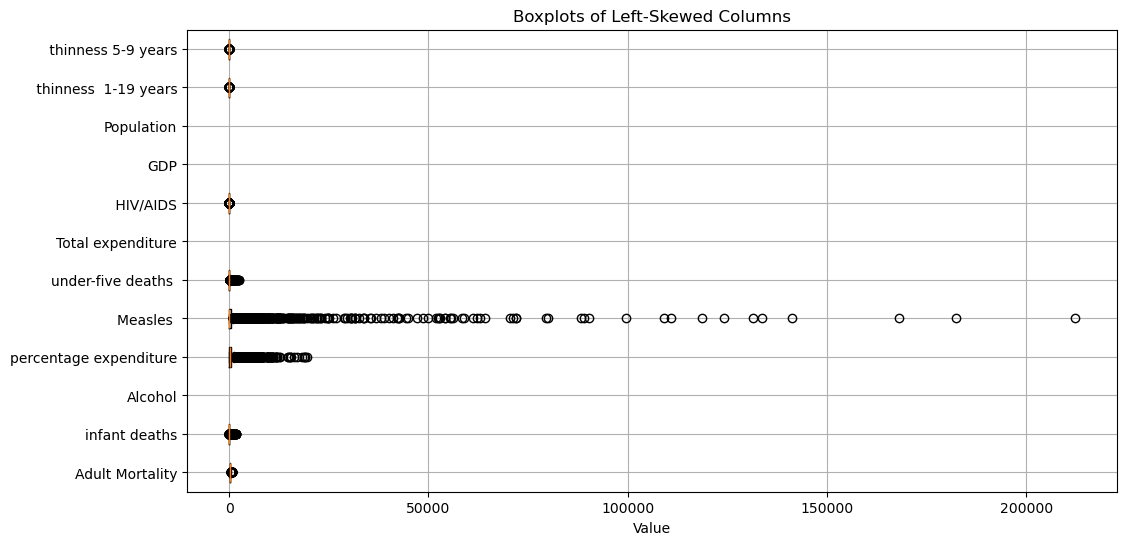

In [183]:
plt.figure(figsize=(12, 6))  
plt.boxplot(X_int[left_skew], vert=False, labels=left_skew)
plt.grid()
plt.xlabel("Value")
plt.title("Boxplots of Left-Skewed Columns")
plt.show()

In [184]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def iqr_rem(data, col):
    percentile_25 = data[col].quantile(0.25)
    percentile_75 = data[col].quantile(0.75)
    iqr = percentile_75 - percentile_25
    lower_bound = percentile_25 - 1.5 * iqr
    upper_bound = percentile_75 + 1.5 * iqr
    # Fix: Add parentheses around the conditions
    df = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column: {col} has {len(df)} outliers")

    data[col] = np.where(data[col] > upper_bound, 
                        upper_bound, 
                        np.where(data[col] < lower_bound, 
                               lower_bound, 
                               data[col]))

    return data[col]

In [185]:
def box_plots(data,col):
    sns.boxplot(x=X_int[col])
    plt.grid()
    plt.ylabel(col)

def kde_plots(data,col):
    sns.kdeplot(data[col], label=col, fill=True)
    plt.xlim(data[col].min(), data[col].max())
    plt.legend()

In [186]:
left_skew

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles ',
 'under-five deaths ',
 'Total expenditure',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years']

Column: Hepatitis B has 252 outliers
Column:  BMI  has 0 outliers
Column: Polio has 278 outliers
Column: Diphtheria  has 297 outliers
Column: Income composition of resources has 130 outliers
Column: Schooling has 42 outliers


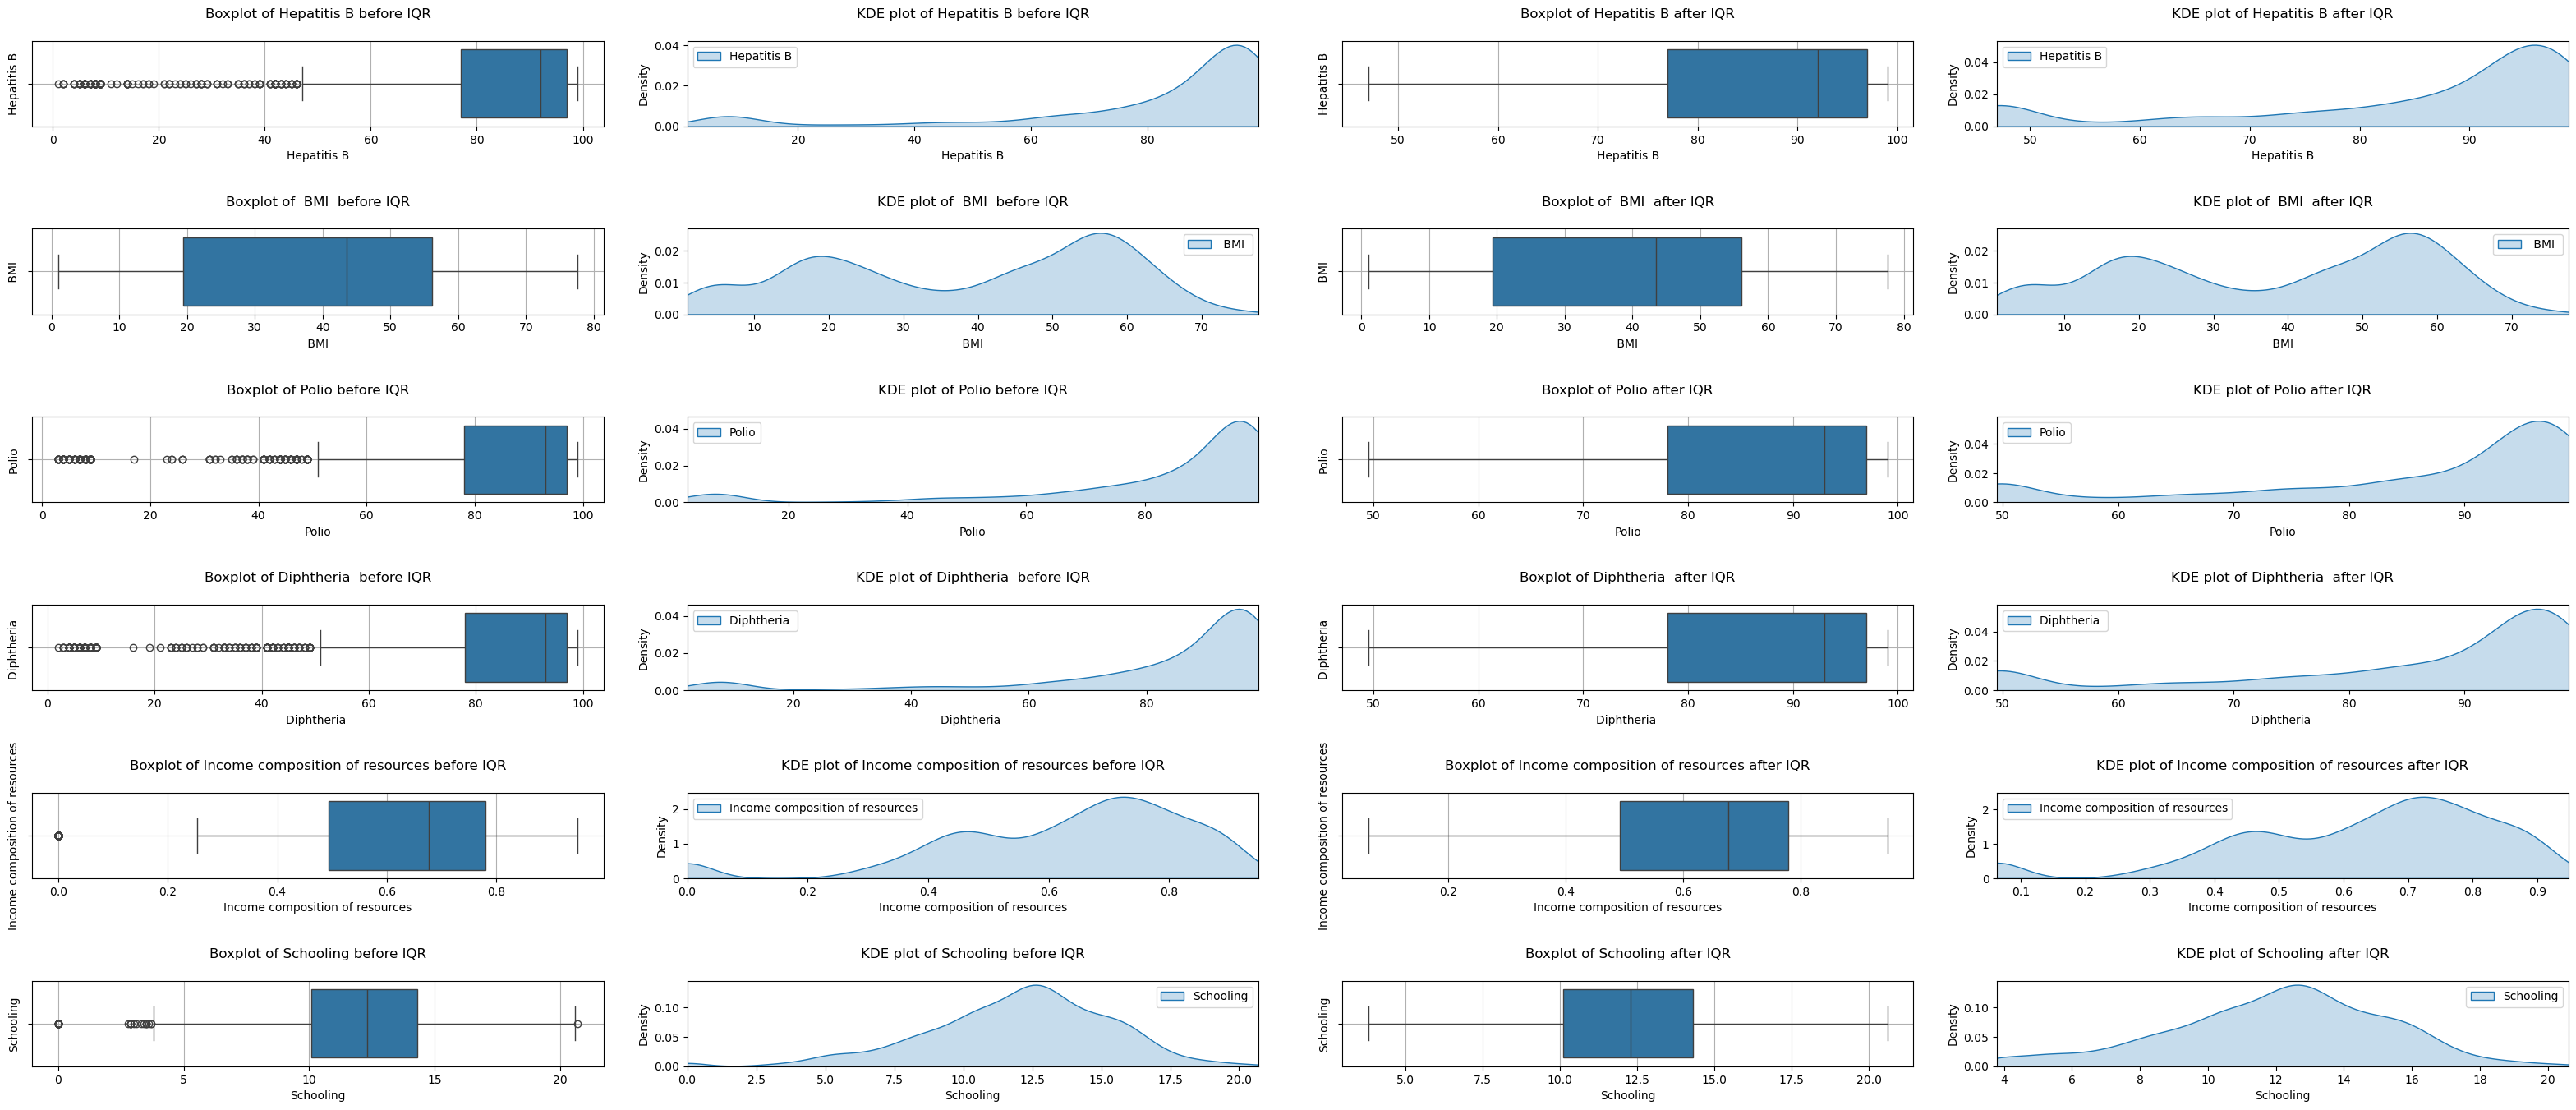

In [187]:
plt.figure(figsize=(32, 16))  # Increased figure size for a bigger graph
iden = 0
row = 1
for col in right_skew:  # Use .columns to iterate over DataFrame columns
    plt.subplot(7, 4, row + iden)  # Changed to 7 rows to accommodate more subplots
    box_plots(X_int, col)
    plt.title(f"Boxplot of {col} before IQR", pad=20)  # Added pad for title visibility

    row += 1
    plt.subplot(7, 4, row + iden)
    kde_plots(X_int, col)
    plt.title(f"KDE plot of {col} before IQR", pad=20)  # Added pad for title visibility

    X_int[col] = iqr_rem(X_int, col)
    
    row += 1
    plt.subplot(7, 4, row + iden)
    box_plots(X_int, col)
    plt.title(f"Boxplot of {col} after IQR", pad=20)  # Added pad for title visibility

    row += 1
    plt.subplot(7, 4, row + iden)
    kde_plots(X_int, col)
    plt.title(f"KDE plot of {col} after IQR", pad=20)  # Added pad for title visibility

    iden += 4
    row = 1

plt.tight_layout(pad=3.0)  # Increased padding for better spacing
plt.show()

Column: Adult Mortality has 82 outliers
Column: infant deaths has 315 outliers
Column: Alcohol has 0 outliers
Column: percentage expenditure has 388 outliers
Column: Measles  has 542 outliers
Column: under-five deaths  has 394 outliers
Column: Total expenditure has 30 outliers
Column:  HIV/AIDS has 542 outliers
Column: GDP has 363 outliers
Column: Population has 294 outliers
Column:  thinness  1-19 years has 100 outliers
Column:  thinness 5-9 years has 99 outliers


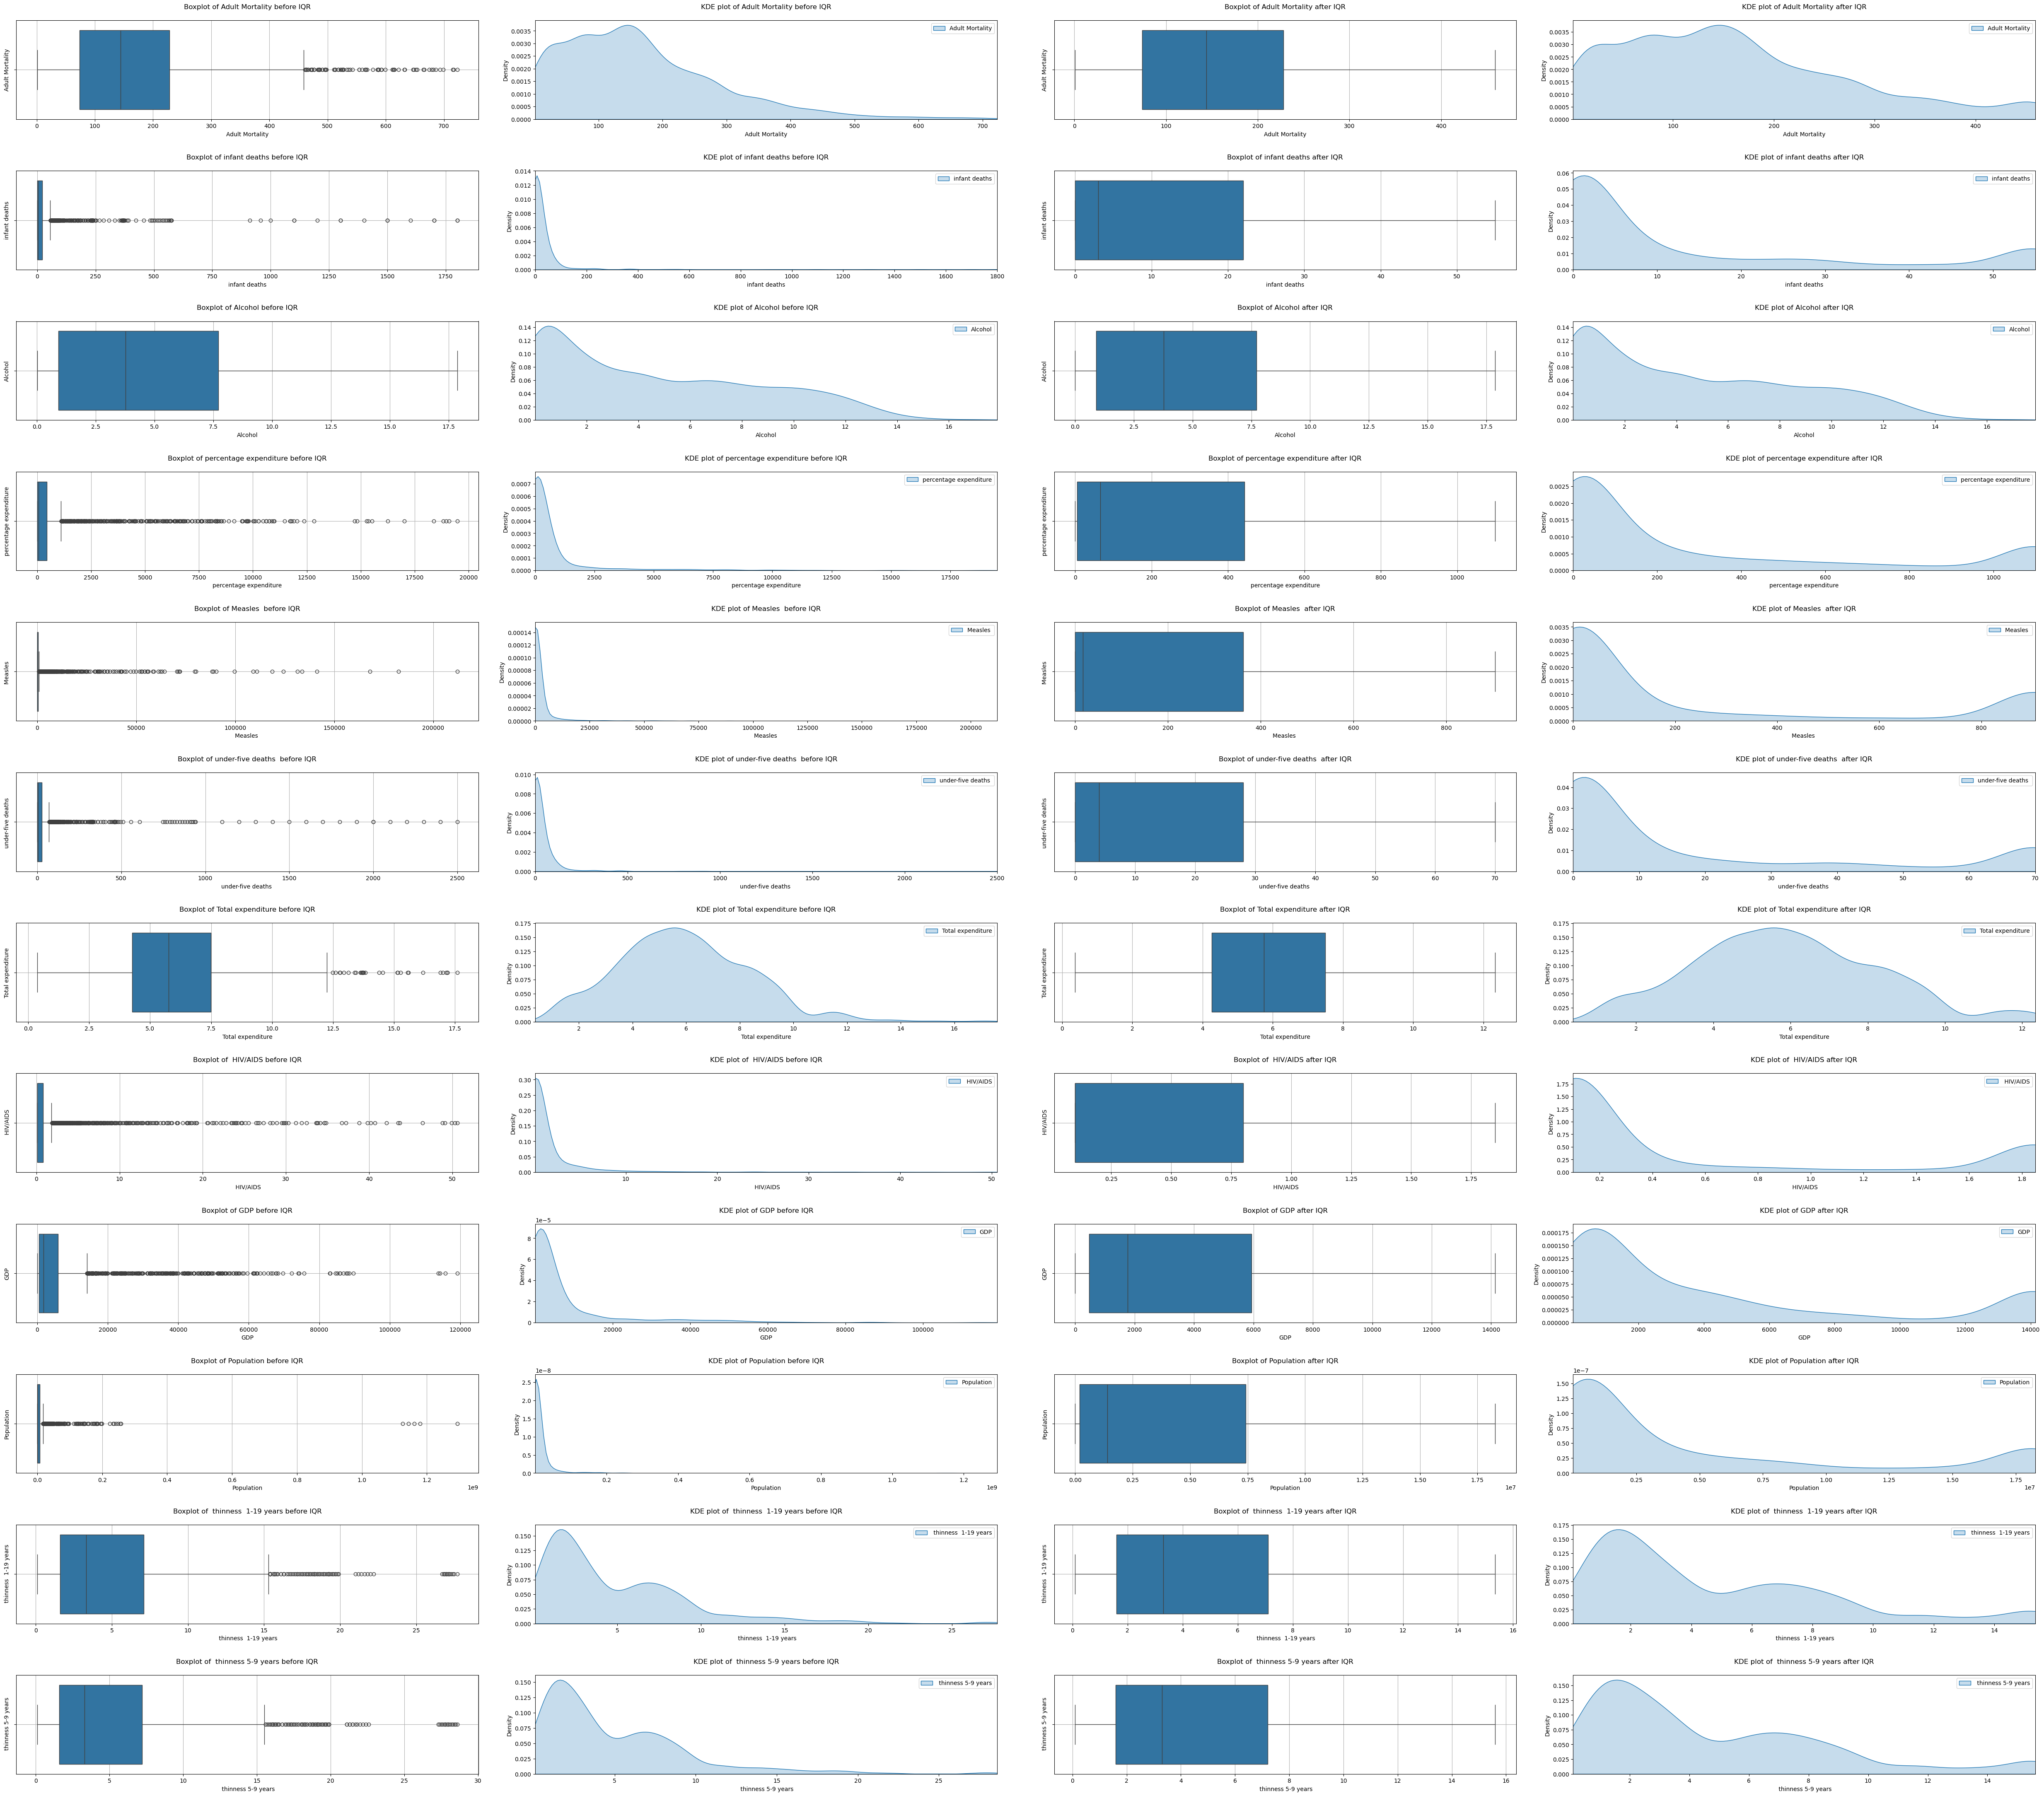

In [188]:
# Same outlier removal is done for left_skews

# Assuming left_skew is a list of column names and X_int is the DataFrame
plt.figure(figsize=(50, 44))  # Increased figure size for a bigger graph
iden = 0
row = 1
for col in left_skew:  # Iterate over left_skew columns
    try:
        plt.subplot(12, 4, row + iden)  # Changed to 12 rows, 4 columns
        box_plots(X_int, col)
        plt.title(f"Boxplot of {col} before IQR", pad=20)  # Added pad for title visibility

        row += 1
        plt.subplot(12, 4, row + iden)
        kde_plots(X_int, col)
        plt.title(f"KDE plot of {col} before IQR", pad=20)  # Added pad for title visibility

        X_int[col] = iqr_rem(X_int, col)  # Apply IQR removal and save in same column
        
        row += 1
        plt.subplot(12, 4, row + iden)
        box_plots(X_int, col)
        plt.title(f"Boxplot of {col} after IQR", pad=20)  # Added pad for title visibility

        row += 1
        plt.subplot(12, 4, row + iden)
        kde_plots(X_int, col)
        plt.title(f"KDE plot of {col} after IQR", pad=20)  # Added pad for title visibility

        iden += 4
        row = 1
    except Exception as e:
        print(f"Skipping column {col} due to error: {e}")
        iden += 3
        row = 1
        continue

plt.tight_layout(pad=3.0)  # Increased padding for better spacing
plt.show()


In [189]:
X_int['Adult Mortality'].describe()

count    2928.000000
mean      162.087432
std       115.866689
min         1.000000
25%        74.000000
50%       144.000000
75%       228.000000
max       459.000000
Name: Adult Mortality, dtype: float64

In [190]:
X_int.columns[0]

'Adult Mortality'

In [191]:
for col in X_int.columns:
    if X_int[col].min() < 100:
        print(f"Column {col} has min value less than 100")

Column Adult Mortality has min value less than 100
Column infant deaths has min value less than 100
Column Alcohol has min value less than 100
Column percentage expenditure has min value less than 100
Column Hepatitis B has min value less than 100
Column Measles  has min value less than 100
Column  BMI  has min value less than 100
Column under-five deaths  has min value less than 100
Column Polio has min value less than 100
Column Total expenditure has min value less than 100
Column Diphtheria  has min value less than 100
Column  HIV/AIDS has min value less than 100
Column GDP has min value less than 100
Column Population has min value less than 100
Column  thinness  1-19 years has min value less than 100
Column  thinness 5-9 years has min value less than 100
Column Income composition of resources has min value less than 100
Column Schooling has min value less than 100


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [193]:
num_cols_new = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [col for col in num_cols_new]
# num_cols = [num for num in num_cols_new if num not in ['Hepatitis B','Population']]
# If time reamins, I will do it using MICE
# As Population and Hepatitis B has more nulls , we will impute it using MICE Algorithm 
knn_imp = KNNImputer(n_neighbors=5)
X_train_nums = knn_imp.fit_transform(X_train[num_cols])
X_test_nums = knn_imp.transform(X_test[num_cols])

In [194]:
# Now replacing these numeric impuded columns in X_train
X_train[num_cols] = X_train_nums
X_test[num_cols] = X_test_nums


## ML models

In [195]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(dtype=np.int32, sparse_output=False, drop='first', handle_unknown='ignore')

# Fit on X_train and transform both X_train and X_test
encoded_train = ohe.fit_transform(X_train[['Status', 'Country']])
encoded_test = ohe.transform(X_test[['Status', 'Country']])

# Get the new column names for the encoded features
encoded_cols = ohe.get_feature_names_out(['Status', 'Country'])

# Create DataFrames for the encoded columns, with the same index as X_train/X_test
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_cols, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_cols, index=X_test.index)

# Drop the original categorical columns and concatenate the encoded columns
X_train_final = pd.concat([X_train.drop(['Status', 'Country'], axis=1), encoded_train_df], axis=1)
X_test_final = pd.concat([X_test.drop(['Status', 'Country'], axis=1), encoded_test_df], axis=1)

In [196]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(X_train_final)
X_train_final = scale.transform(X_train_final)
X_test_final = scale.transform(X_test_final)


In [197]:
# Now applying Linear Regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_final, y_train)
# Predicting on test data
y_pred = model.predict(X_test_final)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'R-squared: {r2:.3f}')

Mean Absolute Error: 1.226
Mean Squared Error: 3.860
R-squared: 0.955


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate Polynomial Features (e.g., degree = 2)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_final)
X_test_poly = poly.transform(X_test_final)

# Step 2: Fit the Linear Regression Model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Step 3: Predict on Test Data
y_pred = model.predict(X_test_poly)

# Step 4: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 5: Print Results
print(f'Mean Absolute Error: {mae:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'R-squared: {r2:.3f}')


MemoryError: Unable to allocate 24.7 GiB for an array with shape (2342, 1414909) and data type float64

In [199]:
from sklearn.svm import SVR

# Initialize and train SVR model
svr_model = SVR(kernel='rbf')  # You can try 'linear', 'poly', or 'rbf'
svr_model.fit(X_train_final, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test_final)

# Evaluate SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("🔍 SVR Results:")
print(f'Mean Absolute Error: {mae_svr:.3f}')
print(f'Mean Squared Error: {mse_svr:.3f}')
print(f'R-squared: {r2_svr:.3f}')

🔍 SVR Results:
Mean Absolute Error: 1.616
Mean Squared Error: 6.998
R-squared: 0.919


In [200]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this value
knn_model.fit(X_train_final, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_final)

# Evaluate KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\n🔍 KNN Regressor Results:")
print(f'Mean Absolute Error: {mae_knn:.3f}')
print(f'Mean Squared Error: {mse_knn:.3f}')
print(f'R-squared: {r2_knn:.3f}')


🔍 KNN Regressor Results:
Mean Absolute Error: 1.295
Mean Squared Error: 4.177
R-squared: 0.952
